First we'll define and label a function to explore:

In [1]:
%matplotlib inline
import xarray as xr
import xyzpy as xyz
import numpy as np

def singuass(x, a, l, phi):
    return np.sin(x / l - phi) * np.exp(-x**2 / a)

r = xyz.Runner(singuass, 'sg(x)')

Then run some nice combos:

In [2]:
combos = {
    'x': np.linspace(-4, 4, 52),
    'a': [1, 2, 3],
    'l': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
    'phi': [0, 1],
}

r.run_combos(combos)

100%|##########| 1872/1872 [00:00<00:00, 175713.04it/s]


<xarray.Dataset>
Dimensions:  (a: 3, l: 6, phi: 2, x: 52)
Coordinates:
  * x        (x) float64 -4.0 -3.843 -3.686 -3.529 -3.373 -3.216 -3.059 ...
  * a        (a) int64 1 2 3
  * l        (l) float64 0.2 0.3 0.4 0.5 0.6 0.7
  * phi      (phi) int64 0 1
Data variables:
    sg(x)    (x, a, l, phi) float64 -1.027e-07 -9.415e-08 -7.809e-08 ...

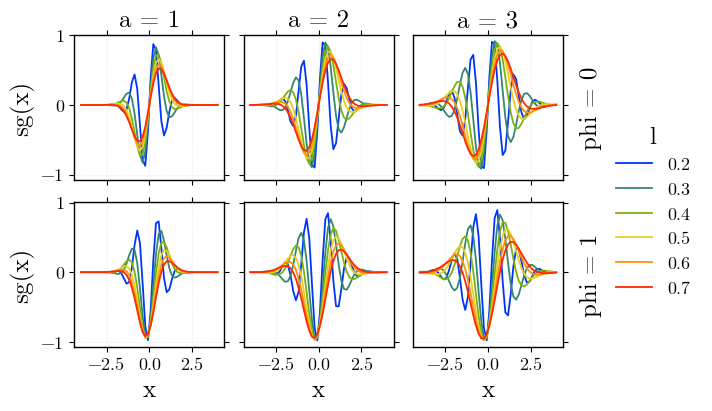

In [3]:
r.last_ds.xyz.lineplot(x='x', y='sg(x)', z='l', col='a', row='phi', 
                       colors=True, figsize=(6, 4))

In [4]:
r.last_ds.xyz.ilineplot(x='x', y='sg(x)', z='l', col='a', row='phi', 
                        colors=True, figsize=(6, 4))

Loading BokehJS ...

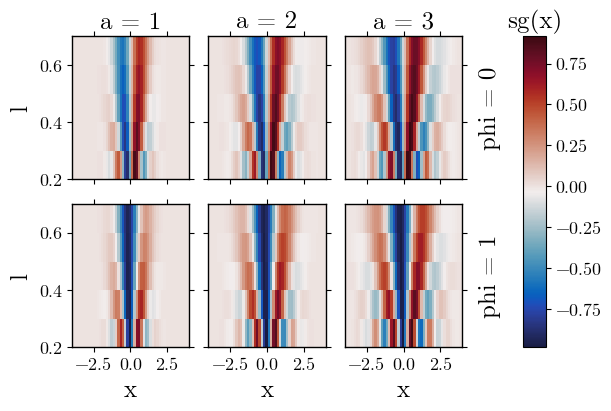

In [5]:
r.last_ds.xyz.heatmap(x='x', y='l', z='sg(x)', col='a', row='phi', 
                      colors=True, colormap='balance', figsize=(6, 4))

In [6]:
r.last_ds.xyz.iheatmap(x='x', y='l', z='sg(x)', col='a', row='phi', 
                       colors=True, colormap='balance', figsize=(6, 4))

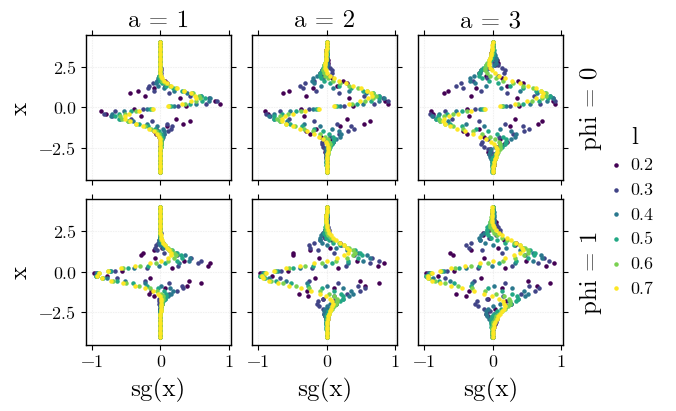

In [7]:
r.last_ds.xyz.scatter(x='sg(x)', y='x', z='l', col='a', row='phi', 
                      colors=True, colormap='viridis', figsize=(6, 4))

In [8]:
r.last_ds.xyz.iscatter(x='sg(x)', y='x', z='l', col='a', row='phi', 
                       colors=True, colormap='viridis', figsize=(6, 4))

Histograms are useful in that they broadcast over any non-specified dimensions. They don't take a ``y`` specification and instead always show the probability density ``f(x)``.

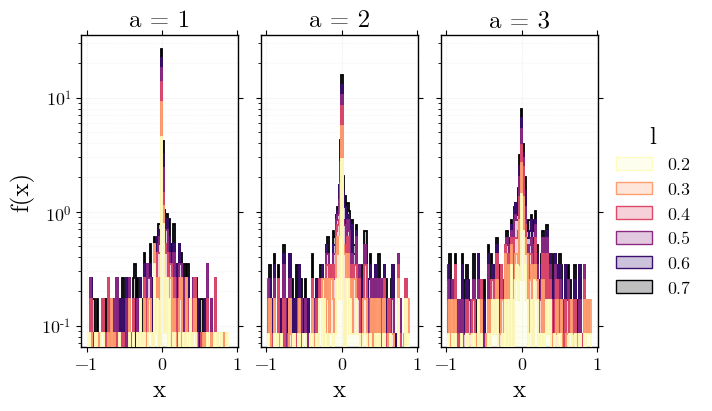

In [9]:
r.last_ds.xyz.histogram(x='sg(x)', z='l', col='a',
                        bins=100, ylog=True, stacked=True, 
                        colors=True, colormap='magma_r', figsize=(6, 4))